In [2]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import csv
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree

In [1]:
class LinearRegression() :
      
    def __init__( self, learning_rate, iterations ) :
        self.learning_rate = learning_rate
        self.iterations = iterations
        
              
    def fit( self, X, Y ) :
        self.m, self.n = X.shape
        self.W = np.zeros(self.n)  
        self.b = 0  
        self.X = X 
        self.Y = Y
                  
        for i in range( self.iterations ) :             
            self.update_weights()             
        return self
      
    def update_weights( self ) :
        Y_pred = self.predict( self.X )
        dW = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred )  ) / self.m
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db  
        return self
      
    def predict( self, X ) :
        return X.dot( self.W ) + self.b
     
        

In [3]:
modelEncoder = LabelEncoder()
transmissionEncoder = LabelEncoder()
fuelTypeEncoder = LabelEncoder()
scaler = MinMaxScaler()

def dataset(brand):
    file = pd.read_csv(brand, quotechar='"', skipinitialspace=True)

    modelEncoder.fit(file["model"])
    file["model"] = modelEncoder.transform(file["model"])
    
    transmissionEncoder.fit(file["transmission"])
    file["transmission"] = transmissionEncoder.transform(file["transmission"])
    
    fuelTypeEncoder.fit(file["fuelType"])
    file["fuelType"] = fuelTypeEncoder.transform(file["fuelType"])

    file = file.head(1000) # Limits dataset size

    X = file.drop(columns = ['price'])
    Y = file.price
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 601)
    
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    print(list(fuelTypeEncoder.classes_))

    return  X_train, X_test, Y_train, Y_test

In [4]:
X_train, X_test, Y_train, Y_test = dataset("UKUsedCarDataSet/audi.csv") # Use Audi dataset as default for KNN analysis

['Diesel', 'Hybrid', 'Petrol']


Predicted values  [18152.88 24030.39 15059.09 13295.16 24644.44 13172.15 23298.54 20228.32
 15740.4  24820.48 12155.9  38132.69 28850.61 22940.32 31354.32 32979.12
 27826.24 29194.61 23209.05 19359.85 27872.86 25587.36 19532.86 30989.05
 21006.22 28919.65 26790.06 20005.9  31783.74 16706.39 14619.   11866.75
 13437.95 10897.17 17361.63 30765.44 20431.61 18208.53 11692.46 17073.75
 27070.11 13892.4  15786.63 15333.91 35803.33 15900.74 28043.15 22399.47
 10049.21 20840.57 16091.84 20891.64 11130.34 11237.38 15446.93 29194.61
 18018.32 17409.38 23239.49 29684.12 16187.8  24202.58 19266.83 30804.05
 30588.75 21160.81 19604.42 14755.76 22997.3  14838.42 20935.39 21666.17
 11163.5  24333.57 35895.28 17644.63 19059.81 10438.84 33018.93 17622.57
 27688.43 37660.   27744.22 24147.27 22026.74 20313.9  29083.65 24121.65
 19929.76 21967.45 35504.49 19694.02 25845.07  8526.55 24266.38  9891.78
 28230.87 36239.81 16036.28 28798.43 22384.47 30698.03 23546.17 32192.15
 24650.87 26748.08 16018.97 32916

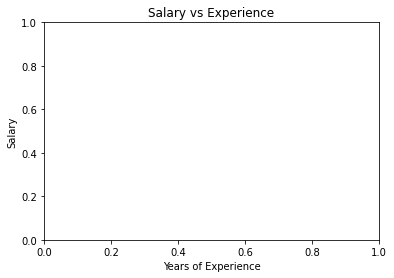

In [12]:
model = LinearRegression( iterations = 1000, learning_rate = 0.01 )

model.fit( X_train, Y_train )
Y_pred = model.predict( X_test )

print( "Predicted values ", np.round( Y_pred, 2 ) ) 
print( "Real values      ", Y_test )
# print( "Trained W        ", round( model.W[0], 2 ) )
# print( "Trained b        ", round( model.b, 2 ) )

# Visualization on test set 

# plt.scatter( X_test, Y_test, color = 'blue' )
# plt.plot( X_test, Y_pred, color = 'orange' )
plt.title( 'Salary vs Experience' )
plt.xlabel( 'Years of Experience' )
plt.ylabel( 'Salary' )

plt.show()

In [24]:
def rmse(test, pred):
    print("RMSE: ")
    MSE = np.square(np.subtract(test, pred)).mean()
    return sqrt(MSE)

In [40]:
def evaluation(train, test, yTrain, yTest):    
    y_pred =  model.predict(X_test)
    error = rmse(yTest, y_pred) 
    print('The RMSE value is:', error)
    for i in range(len(y_pred)):
        print("\nOriginal value:", yTest.iloc[i], "vs the predicted value:", y_pred[i])
        print("The difference is:", yTest.iloc[i] - y_pred[i])
evaluation(X_train, X_test, Y_train, Y_test)

RMSE: 
The RMSE value is: 5125.277827632167

Original value: 18498 vs the predicted value: 18152.88198496125
The difference is: 345.11801503875176

Original value: 22995 vs the predicted value: 24030.38771384
The difference is: -1035.3877138399985

Original value: 12495 vs the predicted value: 15059.086038630097
The difference is: -2564.0860386300974

Original value: 14500 vs the predicted value: 13295.158437002976
The difference is: 1204.841562997024

Original value: 24995 vs the predicted value: 24644.442990081705
The difference is: 350.5570099182951

Original value: 10200 vs the predicted value: 13172.154766965858
The difference is: -2972.1547669658576

Original value: 21995 vs the predicted value: 23298.536573880963
The difference is: -1303.5365738809633

Original value: 16800 vs the predicted value: 20228.32284515676
The difference is: -3428.3228451567593

Original value: 12798 vs the predicted value: 15740.397086204484
The difference is: -2942.3970862044844

Original value: 20498